<a href="https://colab.research.google.com/github/Adarsha08/project-destroy/blob/main/AI_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 29.7 MB/s eta 0:00:00


Comfort Level: 50.0


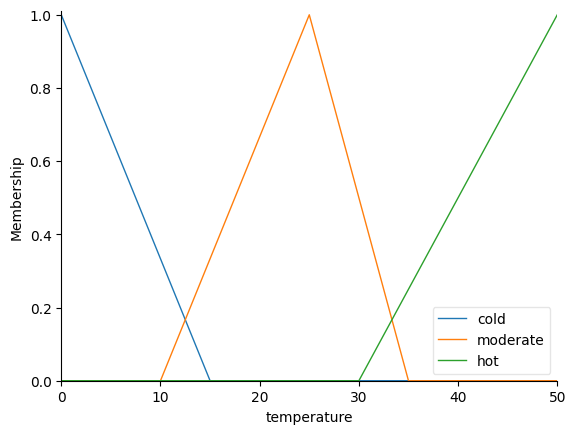

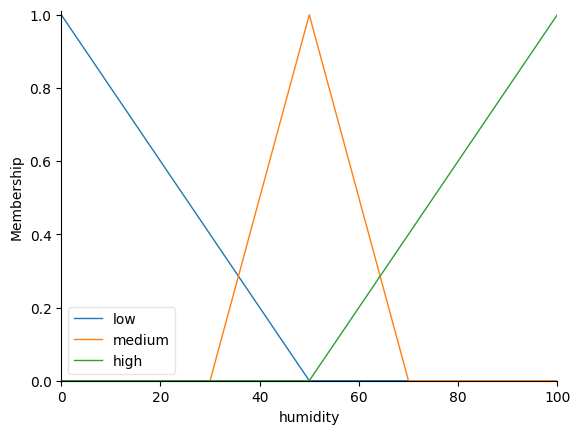

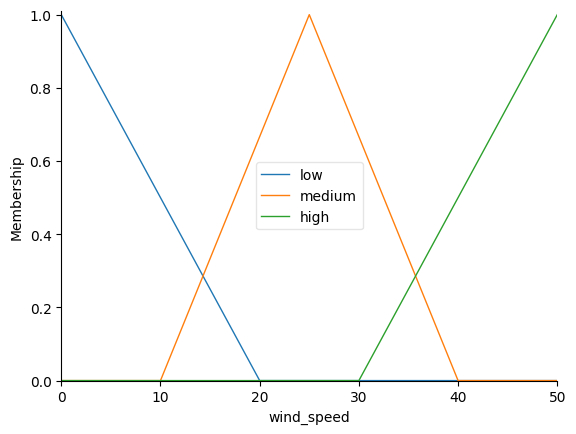

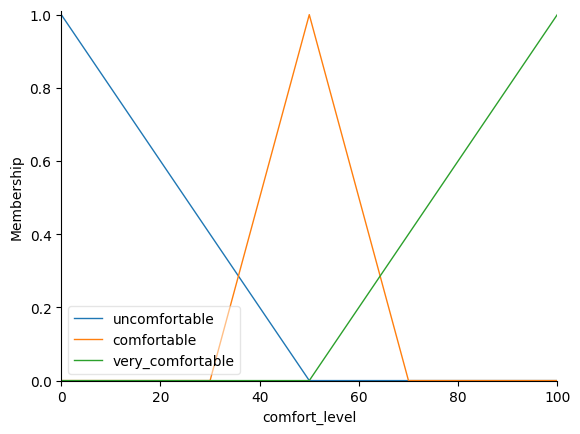

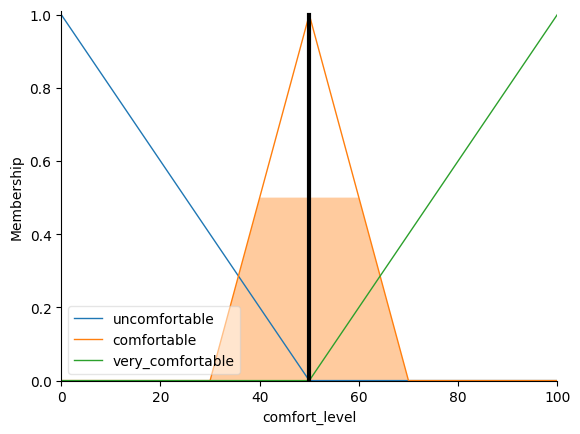

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define input variables (temperature, humidity, and wind speed)
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')  # 0-50 °C
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')  # Percentage, 0-100
wind_speed = ctrl.Antecedent(np.arange(0, 51, 1), 'wind_speed')  # Wind speed, 0-50 km/h

# Define the output variable (comfort level)
comfort_level = ctrl.Consequent(np.arange(0, 101, 1), 'comfort_level')

# Membership functions for temperature
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 15])
temperature['moderate'] = fuzz.trimf(temperature.universe, [10, 25, 35])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 50, 50])

# Membership functions for humidity
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

# Membership functions for wind speed
wind_speed['low'] = fuzz.trimf(wind_speed.universe, [0, 0, 20])
wind_speed['medium'] = fuzz.trimf(wind_speed.universe, [10, 25, 40])
wind_speed['high'] = fuzz.trimf(wind_speed.universe, [30, 50, 50])

# Membership functions for comfort level
comfort_level['uncomfortable'] = fuzz.trimf(comfort_level.universe, [0, 0, 50])
comfort_level['comfortable'] = fuzz.trimf(comfort_level.universe, [30, 50, 70])
comfort_level['very_comfortable'] = fuzz.trimf(comfort_level.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['moderate'] & humidity['medium'] & wind_speed['low'], comfort_level['comfortable'])
rule2 = ctrl.Rule(temperature['hot'] & humidity['high'] & wind_speed['low'], comfort_level['uncomfortable'])
rule3 = ctrl.Rule(temperature['cold'] & humidity['low'] & wind_speed['high'], comfort_level['very_comfortable'])

# Create control system and simulation
comfort_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
comfort_sim = ctrl.ControlSystemSimulation(comfort_ctrl)

# Example inputs: 30°C temperature, 60% humidity, 10 km/h wind speed
comfort_sim.input['temperature'] = 30
comfort_sim.input['humidity'] = 60
comfort_sim.input['wind_speed'] = 10

# Compute the output
comfort_sim.compute()

# Display the output
print(f"Comfort Level: {comfort_sim.output['comfort_level']}")

# Visualize the fuzzy membership functions
temperature.view()
humidity.view()
wind_speed.view()
comfort_level.view()

# Visualize the final result (aggregated output)
comfort_level.view(sim=comfort_sim)
plt.show()
